In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")
from tslearn.clustering import TimeSeriesKMeans, KShape
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from catboost import CatBoostRegressor
from sklearn.cluster import KMeans
from kneed import DataGenerator, KneeLocator
from sklearn.preprocessing import StandardScaler

In [4]:
df1 = pd.read_feather("Total_GR.feather")

In [5]:
df1

,Date,Solar,Wind Onshore,Renewable Total,Load_GR,Prices_GR,Forecasted Load,Net_Position_GR,Solar_FC,Wind Onshore_FC
0,2014-12-29 00:00:00+02:00,0.0,0.0,0.0,0.000,50.10,50.10,50.10,50.10,50.10
1,2014-12-29 01:00:00+02:00,0.0,997.0,997.0,517.500,38.00,38.00,38.00,38.00,38.00
2,2014-12-29 02:00:00+02:00,0.0,888.0,888.0,459.500,31.00,31.00,31.00,31.00,31.00
3,2014-12-29 03:00:00+02:00,0.0,855.0,855.0,441.525,28.05,28.05,28.05,28.05,28.05
4,2014-12-29 04:00:00+02:00,0.0,798.0,798.0,412.060,26.12,26.12,26.12,26.12,26.12
...,...,...,...,...,...,...,...,...,...,...
61436,2021-12-31 20:00:00+02:00,0.0,1831.0,1831.0,7246.000,189.46,7577.00,-66.00,0.00,1461.00
61437,2021-12-31 21:00:00+02:00,0.0,1724.0,1724.0,6514.000,185.63,7010.00,-66.00,0.00,1332.00
61438,2021-12-31 22:00:00+02:00,0.0,1466.0,1466.0,5720.000,181.56,6406.00,-66.00,0.00,1214.00
61439,2021-12-31 23:00:00+02:00,0.0,1279.0,1279.0,5349.000,180.00,5877.00,-399.00,0.00,1102.00


<AxesSubplot:>

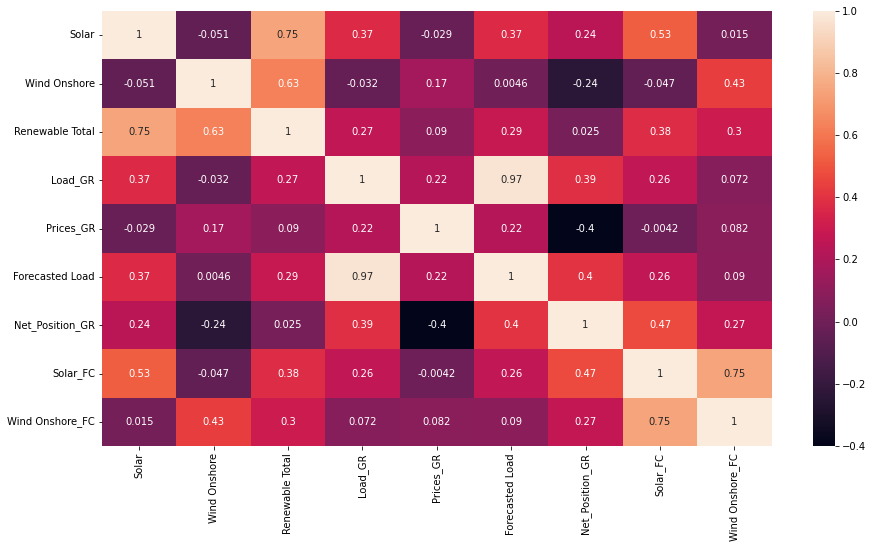

In [6]:
plt.figure(figsize = (15,8))
sns.heatmap(df1.drop("Date",axis=1).corr(),annot=True)

<AxesSubplot:xlabel='Date', ylabel='Prices_GR'>

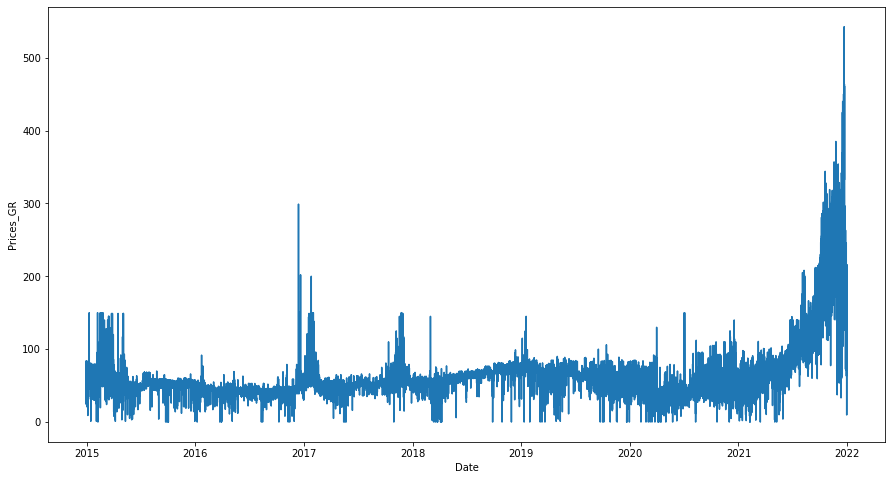

In [8]:
plt.figure(figsize = (15,8))
sns.lineplot(x=df1["Date"],y=df1["Prices_GR"])